<a href="https://colab.research.google.com/github/thenaivekid/RTViton/blob/main/Viton_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Virtual Try-On using IP-Adapters Inpainting

by [Tony Assi](https://www.tonyassi.com/)

Check out the [blog post](https://huggingface.co/blog/tonyassi/virtual-try-on-ip-adapter) for this notebook

---

*This notebook requires a GPU. Go to Runtime->Change Runtime Type and select a GPU:*

A100 ✅

V100 ✅

T4 ✅

CPU ❌

TPU ❌

---

![image/jpeg](https://cdn-uploads.huggingface.co/production/uploads/648a824a8ca6cf9857d1349c/r5JBiW4d1h_jK3Sy3NOOj.jpeg)

**Install libraries**

In [ ]:
!pip install diffusers accelerate

**Import libraries**

In [ ]:
from diffusers import AutoPipelineForInpainting, AutoencoderKL
from diffusers.utils import load_image
import torch

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
import torch
from diffusers import DiffusionPipeline, UNet2DConditionModel, LCMScheduler
from huggingface_hub import hf_hub_download
from safetensors.torch import load_file
base_model_id = "stabilityai/stable-diffusion-xl-base-1.0"
repo_name = "tianweiy/DMD2"
ckpt_name = "dmd2_sdxl_4step_unet_fp16.bin"
# Load model.
unet = UNet2DConditionModel.from_config(base_model_id, subfolder="unet").to("cuda", torch.float16)
unet.load_state_dict(torch.load(hf_hub_download(repo_name, ckpt_name), map_location="cuda"))
pipe = DiffusionPipeline.from_pretrained(base_model_id, unet=unet, torch_dtype=torch.float16, variant="fp16").to("cuda")


/usr/local/lib/python3.11/dist-packages/diffusers/configuration_utils.py:245: FutureWarning: It is deprecated to pass a pretrained model name or path to `from_config`.If you were trying to load a model, please use <class 'diffusers.models.unets.unet_2d_condition.UNet2DConditionModel'>.load_config(...) followed by <class 'diffusers.models.unets.unet_2d_condition.UNet2DConditionModel'>.from_config(...) instead. Otherwise, please make sure to pass a configuration dictionary instead. This functionality will be removed in v1.0.0.
  deprecate("config-passed-as-path", "1.0.0", deprecation_message, standard_warn=False)
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

**Load the pipeline**

In [ ]:
from diffusers import AutoPipelineForInpainting, AutoencoderKL
from diffusers.utils import load_image
import torch
vae = AutoencoderKL.from_pretrained("madebyollin/sdxl-vae-fp16-fix", torch_dtype=torch.float16)
pipeline = AutoPipelineForInpainting.from_pipe(pipe, vae=vae, torch_dtype=torch.float16, variant="fp16", use_safetensors=True).to("cuda")
pipeline.load_ip_adapter("h94/IP-Adapter", subfolder="sdxl_models", weight_name="ip-adapter_sdxl.bin", low_cpu_mem_usage=True)
# ip_adapter_path = "/content/drive/MyDrive/ip_adapter.bin"
# ip_adapter = torch.load(ip_adapter_path, map_location="cuda")  # Load on GPU for speed

# Assign the IP-Adapter weights (assuming your pipeline has the expected method or attribute)
# pipeline.load_ip_adapter_weights(ip_adapter["image_proj"], ip_adapter["ip_adapter"])


NameError: name 'AutoencoderKL' is not defined

**Load the main image**

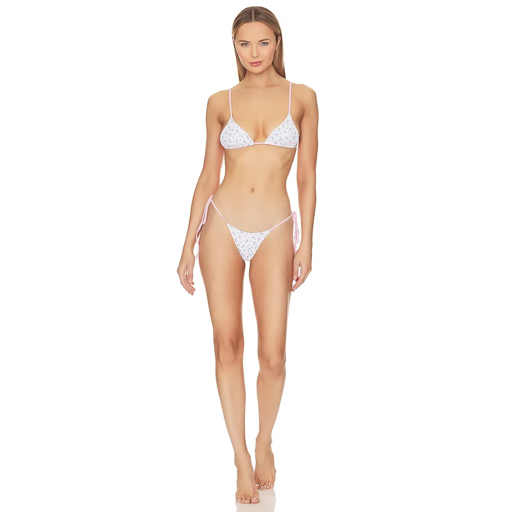

In [ ]:
# image = load_image('https://cdn-uploads.huggingface.co/production/uploads/648a824a8ca6cf9857d1349c/jpFBKqYB3BtAW26jCGJKL.jpeg').convert("RGB")
# image.resize((512, 512))

**Load the clothing image**

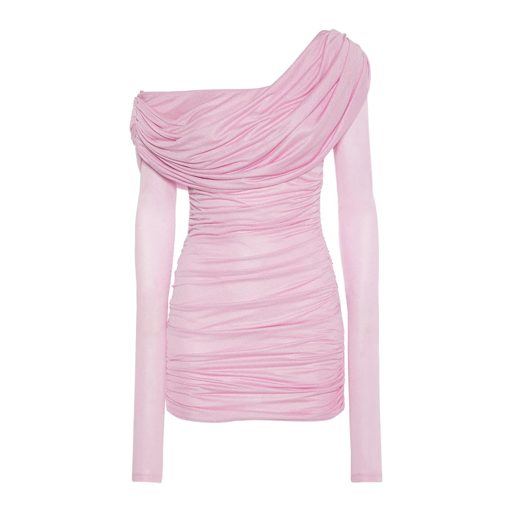

In [ ]:
# ip_image = load_image('https://cdn-uploads.huggingface.co/production/uploads/648a824a8ca6cf9857d1349c/NL6mAYJTuylw373ae3g-Z.jpeg').convert("RGB")
# ip_image.resize((512, 512))

**Create the mask image**

To create the mask image we're going to use a [body segmentation tool](https://github.com/TonyAssi/Segment-Body) that will do it automatically

In [ ]:
! git clone https://github.com/TonyAssi/Segment-Body.git
%cd /content/Segment-Body
! pip install -r requirements.txt
! cp ./SegBody.py ..
%cd ..

Cloning into 'Segment-Body'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 40 (delta 10), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (40/40), 14.29 KiB | 14.29 MiB/s, done.
Resolving deltas: 100% (10/10), done.
/content/Segment-Body
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.5/439.5 kB 9.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 89.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.8 MB/s eta 0:00:00
  Created wheel for insightface: filename=insightface-0.7.3-cp311-cp311-linux_x86_64.whl size=1064895 sha256

/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.1 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


download_path: /root/.insightface/models/buffalo_l


100%|██████████| 281857/281857 [00:04<00:00, 60926.48KB/s]
/usr/local/lib/python3.11/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:115: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


config.json:   0%|          | 0.00/1.73k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/109M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/271 [00:00<?, ?B/s]

Device set to use cuda:0
/usr/local/lib/python3.11/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


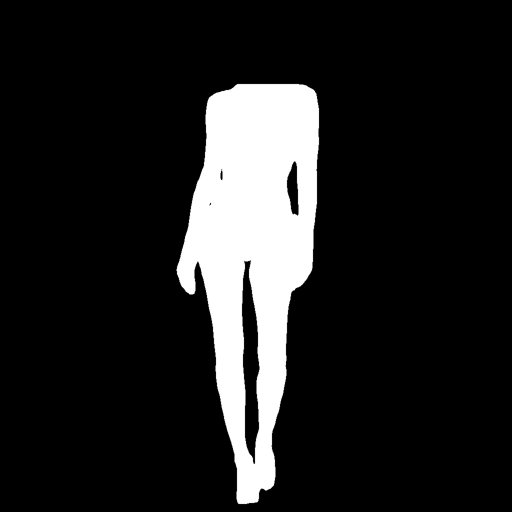

In [ ]:
from SegBody import segment_body
seg_image, mask_image = segment_body(image, face=False)
mask_image.resize((512, 512))

Mounted at /content/drive


**Generate image**

In [ ]:
from PIL import Image
from google.colab import drive
drive.mount('/content/drive')
person1_masked = "/content/drive/MyDrive/viton_test/mask_before_1.jpg"
person2_masked = "/content/drive/MyDrive/viton_test/mask_before_2.jpg"
cloth1 = "/content/drive/MyDrive/viton_test/cloth_1.jpg"
cloth2 = "/content/drive/MyDrive/viton_test/cloth_2.jpg"

person1_masked_img = Image.open(person1_masked)
person2_masked_img = Image.open(person2_masked)
cloth1_img = Image.open(cloth1)
cloth2_img = Image.open(cloth2)
person1_img =  Image.open("/content/drive/MyDrive/viton_test/model_1.png")
person2_img =  Image.open("/content/drive/MyDrive/viton_test/model_2.jpg")
# _, person1_mask = segment_body(person1_img, face=False)
# _, person2_mask = segment_body(person2_img, face=False)




  0%|          | 0/3 [00:00<?, ?it/s]

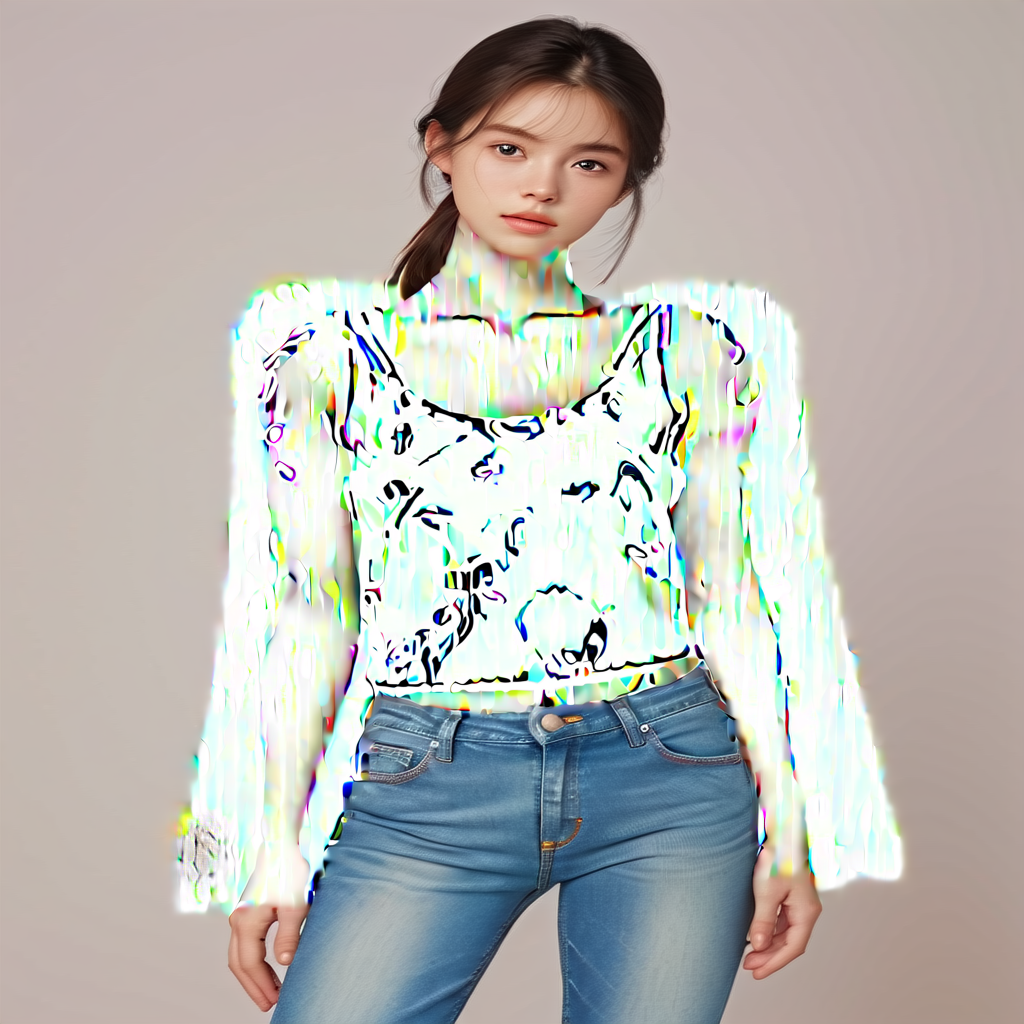

In [ ]:
pipeline.set_ip_adapter_scale(1.0)
images = pipeline(
    prompt="photorealistic, perfect body, beautiful skin, realistic skin, natural skin",
    negative_prompt="ugly, bad quality, bad anatomy, deformed body, deformed hands, deformed feet, deformed face, deformed clothing, deformed skin, bad skin, leggings, tights, stockings",
    image=person1_img,
    mask_image=person1_masked_img,
    ip_adapter_image=cloth1_img,
    strength=0.99,
    guidance_scale=7.5,
    num_inference_steps=4,
).images
images[0]

In [ ]:
images[0].save("/content/drive/MyDrive/viton_test/og_ip_1.jpg")

  0%|          | 0/3 [00:00<?, ?it/s]

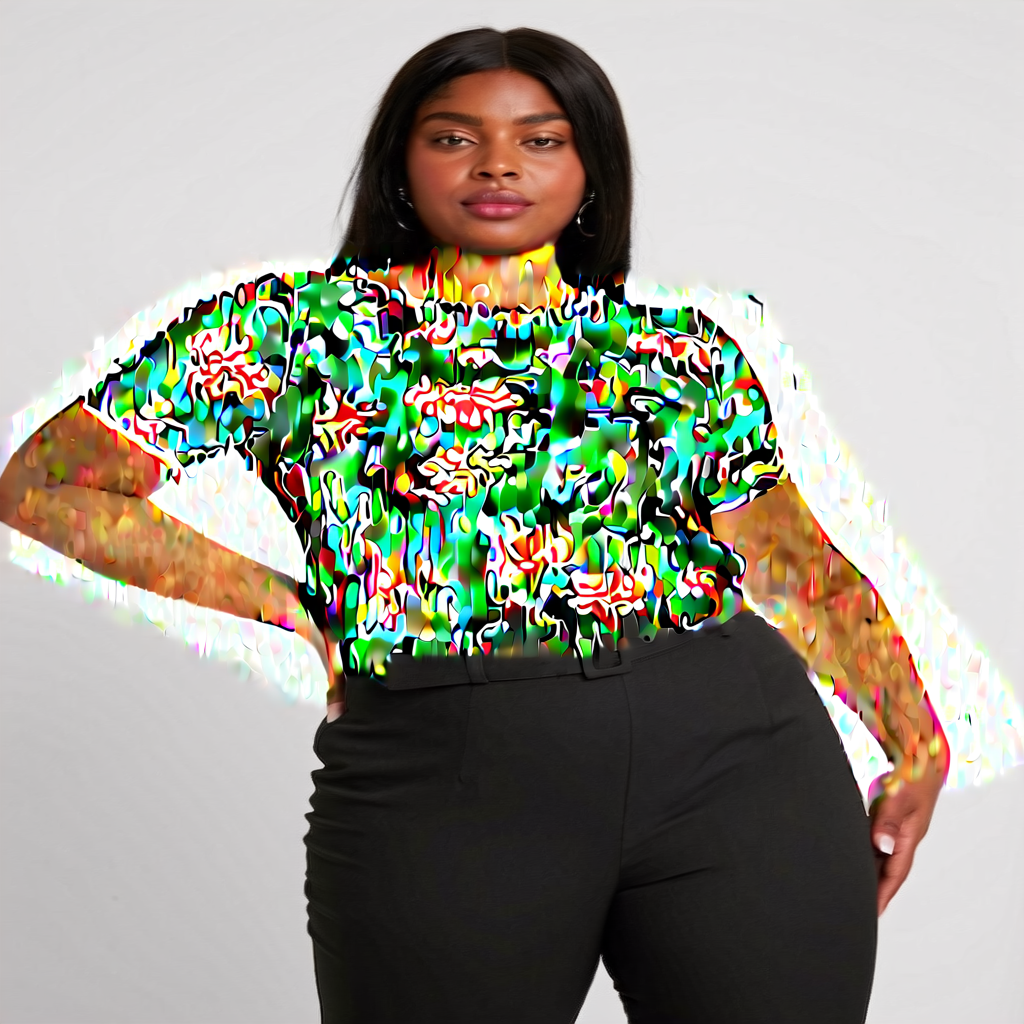

In [ ]:
pipeline.set_ip_adapter_scale(1.0)
images = pipeline(
    prompt="photorealistic, perfect body, beautiful skin, realistic skin, natural skin",
    negative_prompt="ugly, bad quality, bad anatomy, deformed body, deformed hands, deformed feet, deformed face, deformed clothing, deformed skin, bad skin, leggings, tights, stockings",
    image=person2_img,
    mask_image=person2_masked_img,
    ip_adapter_image=cloth2_img,
    strength=0.99,
    guidance_scale=7.5,
    num_inference_steps=4,
).images
images[0]

In [ ]:
images[0].save("/content/drive/MyDrive/viton_test/og_ip_2.jpg")

**Virtual Try-On Function**

Now lets put it all together into a function so that all you need to do is pass the image and the clothing

In [ ]:
def virtual_try_on(img, clothing, prompt, negative_prompt, ip_scale=1.0, strength=0.99, guidance_scale=7.5, steps=100):
    _, mask_img = segment_body(img, face=False)
    pipeline.set_ip_adapter_scale(ip_scale)
    images = pipeline(
        prompt=prompt,
        negative_prompt=negative_prompt,
        image=img,
        mask_image=mask_img,
        ip_adapter_image=clothing,
        strength=strength,
        guidance_scale=guidance_scale,
        num_inference_steps=steps,
    ).images
    return images[0]

In [ ]:
image = load_image('https://cdn-uploads.huggingface.co/production/uploads/648a824a8ca6cf9857d1349c/jpFBKqYB3BtAW26jCGJKL.jpeg').convert("RGB")
ip_image = load_image('https://cdn-uploads.huggingface.co/production/uploads/648a824a8ca6cf9857d1349c/NL6mAYJTuylw373ae3g-Z.jpeg').convert("RGB")

In [ ]:
virtual_try_on(img=image,
               clothing=ip_image,
               prompt="photorealistic, perfect body, beautiful skin, realistic skin, natural skin",
               negative_prompt="ugly, bad quality, bad anatomy, deformed body, deformed hands, deformed feet, deformed face, deformed clothing, deformed skin, bad skin, leggings, tights, stockings")

---
# my ip adapter

In [ ]:
import torch
from diffusers import DiffusionPipeline, UNet2DConditionModel, LCMScheduler
from huggingface_hub import hf_hub_download
from safetensors.torch import load_file
base_model_id = "stabilityai/stable-diffusion-xl-base-1.0"
repo_name = "tianweiy/DMD2"
ckpt_name = "dmd2_sdxl_4step_unet_fp16.bin"
# Load model.
unet = UNet2DConditionModel.from_config(base_model_id, subfolder="unet").to("cuda", torch.float16)
unet.load_state_dict(torch.load(hf_hub_download(repo_name, ckpt_name), map_location="cuda"))
pipe = DiffusionPipeline.from_pretrained(base_model_id, unet=unet, torch_dtype=torch.float16, variant="fp16").to("cuda")


/usr/local/lib/python3.11/dist-packages/diffusers/configuration_utils.py:245: FutureWarning: It is deprecated to pass a pretrained model name or path to `from_config`.If you were trying to load a model, please use <class 'diffusers.models.unets.unet_2d_condition.UNet2DConditionModel'>.load_config(...) followed by <class 'diffusers.models.unets.unet_2d_condition.UNet2DConditionModel'>.from_config(...) instead. Otherwise, please make sure to pass a configuration dictionary instead. This functionality will be removed in v1.0.0.
  deprecate("config-passed-as-path", "1.0.0", deprecation_message, standard_warn=False)
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
from diffusers import AutoPipelineForInpainting, AutoencoderKL
from diffusers.utils import load_image
import torch
vae = AutoencoderKL.from_pretrained("madebyollin/sdxl-vae-fp16-fix", torch_dtype=torch.float16)
pipeline = AutoPipelineForInpainting.from_pipe(pipe, vae=vae, torch_dtype=torch.float16, variant="fp16", use_safetensors=True).to("cuda")


In [ ]:
# pipeline.load_ip_adapter("h94/IP-Adapter", subfolder="sdxl_models", weight_name="ip-adapter_sdxl.bin", low_cpu_mem_usage=True)

pipeline.load_ip_adapter("thenaivekid/ip_adapter",subfolder="dumb", weight_name="model.bin", low_cpu_mem_usage=True)

# # Assign the IP-Adapter weights (assuming your pipeline has the expected method or attribute)
# pipeline.load_ip_adapter_weights(ip_adapter["image_proj"], ip_adapter["ip_adapter"])


In [ ]:
from PIL import Image
from google.colab import drive
drive.mount('/content/drive')
person1_masked = "/content/drive/MyDrive/viton_test/mask_before_1.jpg"
person2_masked = "/content/drive/MyDrive/viton_test/mask_before_2.jpg"
cloth1 = "/content/drive/MyDrive/viton_test/cloth_1.jpg"
cloth2 = "/content/drive/MyDrive/viton_test/cloth_2.jpg"

person1_masked_img = Image.open(person1_masked)
person2_masked_img = Image.open(person2_masked)
cloth1_img = Image.open(cloth1)
cloth2_img = Image.open(cloth2)
person1_img =  Image.open("/content/drive/MyDrive/viton_test/model_1.png")
person2_img =  Image.open("/content/drive/MyDrive/viton_test/model_2.jpg")
# _, person1_mask = segment_body(person1_img, face=False)
# _, person2_mask = segment_body(person2_img, face=False)




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


  0%|          | 0/3 [00:00<?, ?it/s]

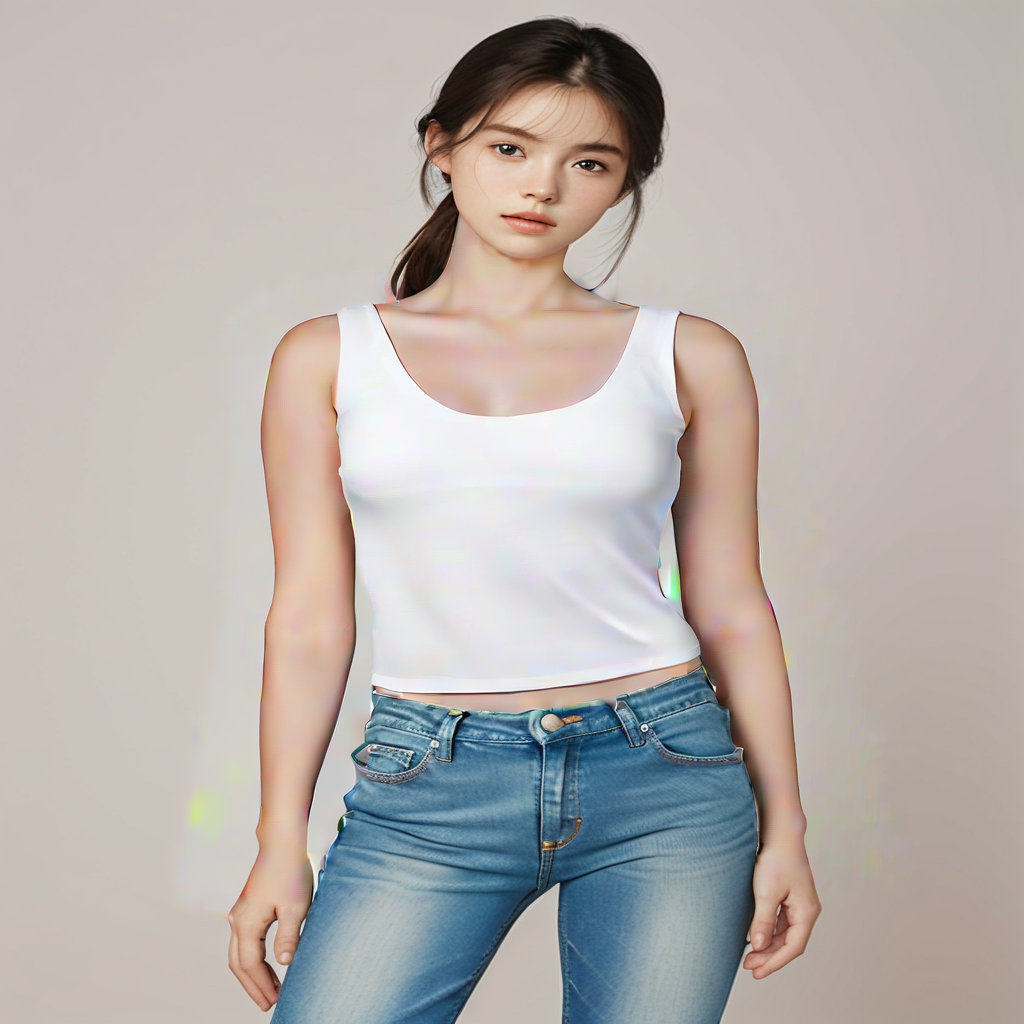

In [ ]:
pipeline.set_ip_adapter_scale(1.0)
images = pipeline(
    prompt="photorealistic, perfect body, beautiful skin, realistic skin, natural skin",
    negative_prompt="ugly, bad quality, bad anatomy, deformed body, deformed hands, deformed feet, deformed face, deformed clothing, deformed skin, bad skin, leggings, tights, stockings",
    image=person1_img,
    mask_image=person1_masked_img,
    ip_adapter_image=cloth1_img,
    strength=0.99,
    guidance_scale=7.5,
    num_inference_steps=4,
).images
images[0]

  0%|          | 0/3 [00:00<?, ?it/s]

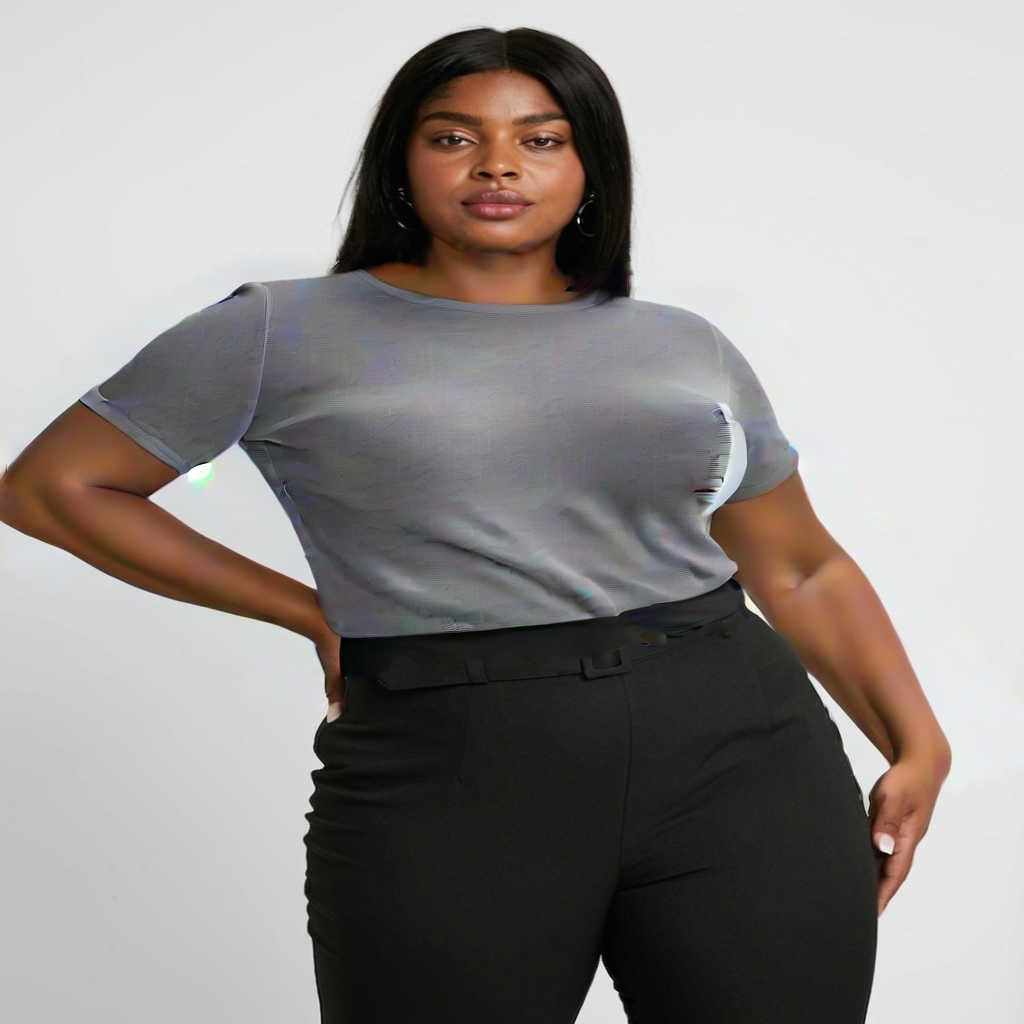

In [ ]:
pipeline.set_ip_adapter_scale(1.0)
images = pipeline(
    prompt="photorealistic, perfect body, beautiful skin, realistic skin, natural skin",
    negative_prompt="ugly, bad quality, bad anatomy, deformed body, deformed hands, deformed feet, deformed face, deformed clothing, deformed skin, bad skin, leggings, tights, stockings",
    image=person2_img,
    mask_image=person2_masked_img,
    ip_adapter_image=cloth2_img,
    strength=0.99,
    guidance_scale=7.5,
    num_inference_steps=4,
).images
images[0]